In [13]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt


In [16]:
V = '(lambda_0*mu**4*(1 + (bl/lambda_0)*(log(phi))**2)*(phi)**4)/(4*(1 + (xi0*mu**2)*(1 + (bx/xi0)*log(phi))*(phi)**2 )**2)'
parameters = {'lambda_0' : 2.23e-7, 'bl': 1.2e-6, 'mu': 0.102**(0.5), 'xi0': 7.55, 'bx': 11.5}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 7.2) 

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in log
  return (1/2)*bl*mu**4*phi**3*log(phi)/(mu**2*phi**2*xi0*(bx*log(phi)/xi0 + 1) + 1)**2 + (1/4)*lambda_0*mu**4*phi**4*(bl*log(phi)**2/lambda_0 + 1)*(-2*bx*mu**2*phi - 4*mu**2*phi*xi0*(bx*log(phi)/xi0 + 1))/(mu**2*phi**2*xi0*(bx*log(phi)/xi0 + 1) + 1)**3 + lambda_0*mu**4*phi**3*(bl*log(phi)**2/lambda_0 + 1)/(mu**2*phi**2*xi0*(bx*log(phi)/xi0 + 1) + 1)**2


In [17]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save = True)[i] for i in vars)
Ne = background.Ne
Nend = background.N_end
Nend

71.5915915915916

Figure saved as: figures/potential.png


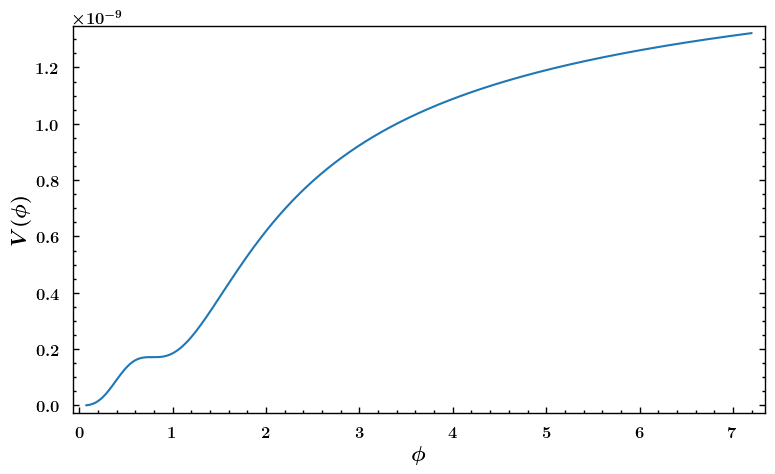

In [18]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)

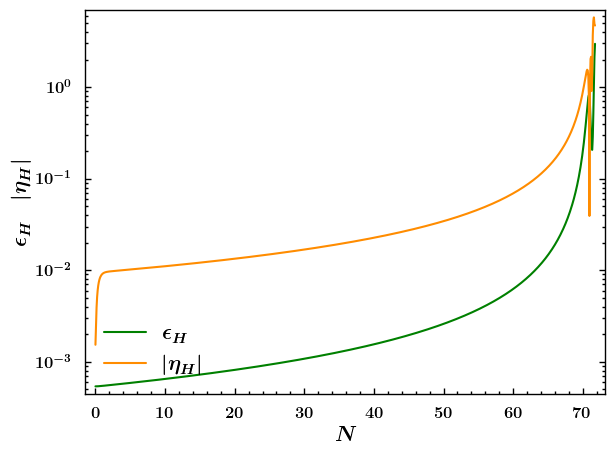

In [19]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


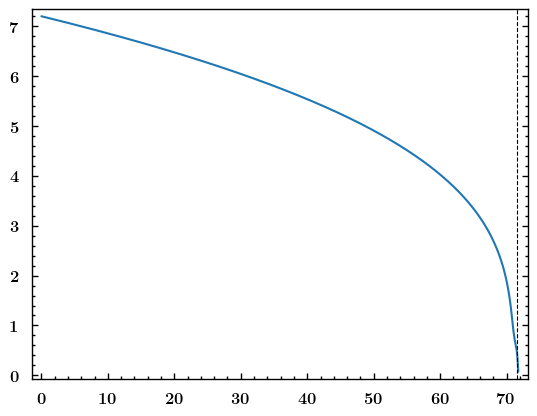

In [10]:
plt.plot(N, phi)
plt.axvline(Nend, linestyle = 'dashed', linewidth = 0.8, color = 'k')

In [11]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 50)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

El modo 0.05 cruza el horizonte a 21.59159159159152 e-folds


In [12]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [13]:
P_s_pivot, P_t_pivot, r_pivot

(6.454963486654002e-09, 8.601198237518455e-11, 0.013324937089577521)

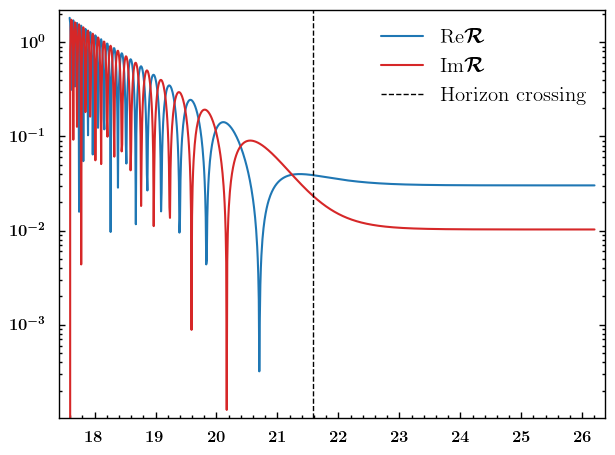

In [14]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [15]:
PS = pert.Power_spectrum(save = True)

k_peak = 4.58\times 10^{-05} Mpc^-1
N_peak = 14.591591591591113
P_s(k_peak) = 7.714533651538833e-09
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

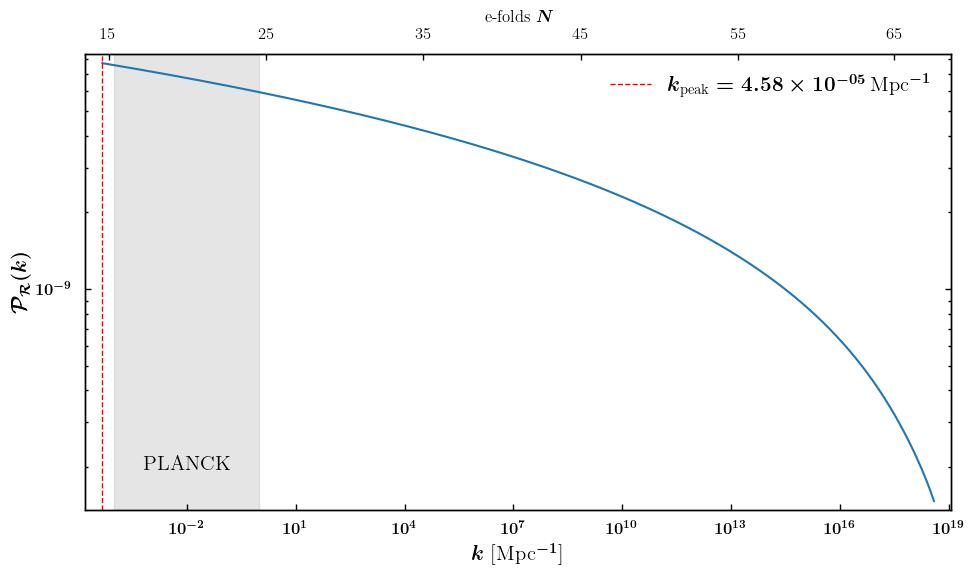

In [16]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)

In [ ]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar= 107.5)
mPBH, fPBH, fPBH_tot = pbh.fPBH(save=True)

fPBH_peak = 0.0
MPBH_peak = 1.192958350088583e+21 M⊙


/var/folders/ym/g3zmjphd5kj9rmvdfmq2bpgr0000gn/T/ipykernel_77129/1913727598.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.ylim(1e-10, 1e1)


(1e-20, 10000.0)

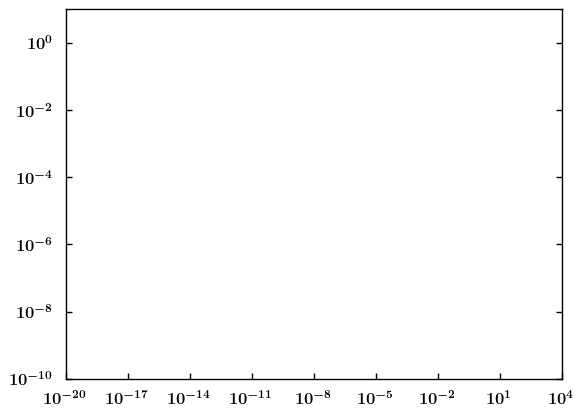

In [18]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-10, 1e1)
plt.xlim(1e-20, 1e4)